In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
file= "/content/drive/My Drive/forGenie1.csv"
import pandas as pd
data = pd.read_csv(file)

In [3]:
data.head()

,Site,DS,Child_Age,Child Gender,Tmt Year,Type of Prognosis,PC_Age,Language,PC Gender,Marital Status,Locality,Occupation,Salary,SES,Education,Family Type,Travel time,Visit cost,Medical cost,Visits,Consultant cost,Consulting time,PC,Insurance,Funding type,Funding,C1: Making you Feel at Ease,C2: Letting you talk,C3: Listening and understanding,C4: Explaining Clearly,C5: Making a plan of action,BTA great deal:Meeting the needs of the ill child,BT2:Planning activities for the ill child,BT3: Reporting to the treatment team,BT4: Managing painful events,BT5: Getting information about child’s illness,BT6: Disciplining the ill child,BT7: Maintaining child’s comfort,BT8: Managing side effects,BT9: Giving medications orally,BT10: Attending medical appointments,BT11: Planning activities for the family,BT12: Meeting the emotional needs of spouse,BT13: Meeting own emotional needs,BT14: Meeting emotional needs of other children,BT15: Meeting emotional needs of extended family,BT16: Managing finances,BT17: Additional household tasks,Family Resource,AR1: How often do you forget to give medicine to your child?,AR2: How often do you miss giving medicine to your child when your child feels better?,AR3: How often do you miss giving medicine to your child when your child feels sick?,AR4: How often do you change the dose of your child’s medicines to suit your child’s needs (like fewer pills than you’re supposed to)?,AR5: How often do you put off refilling your child’s medicines because they cost too much money?,Delayed Appointments,Missed doses,IV1: You have been well informed by the doctor about your child's illness,IV2: You have been well informed by the doctor about what needs to be done to control the disease,IV3: You have been well informed by the doctor about potential negative side effects of treatment and how to control them,IV4: You have been well informed by the doctor about the need to be adherent and consistent,IV5: You have been given counselling by the doctor to process the details of your child’s illness,IV6: Your hospital has a prompting mechanism / reminding process to remind missed appointments/ medicines,Cavg,Primary_Bavg,Secondary_Bavg,Aavg,Iavg
0,SITE-M,M,Less than 5 yrs,MALE,SECOND,STANDARD RISK,Less than 25 yrs,TAMIL,FEMALE,MARRIED,URBAN,SELF EMPLOYED,Rs 1-5 LAKHS,LOWER MIDDLE,HIGH SCHOOL,JOINT,1-3 Hours,> Rs 3000,> Rs 3000,1-2 times,< Rs 500,15-20 mins,BOTH,NO,SELF,SELF,Very good,Very good,Very good,Very good,Good,A great deal,A great deal,A great deal,A great deal,A lot,A lot,A lot,A great deal,A lot,A great deal,A great deal,A lot,A small amount,None,A small amount,A small amount,None,Adequate,Some times,Never,Always,Always,Never,One time,More than once,Always,Always,Most of the times,Always,Always,Some times,4,5,2,3,4
1,SITE-M,M,Less than 5 yrs,FEMALE,FIRST,STANDARD RISK,Less than 25 yrs,OTHERS,FEMALE,MARRIED,URBAN,SELF EMPLOYED,"Rs < 50,000",MIDDLE,DEGREE AND ABOVE,JOINT,1-3 Hours,> Rs 3000,Rs 1000 - 3000,3-4 times,< Rs 500,15-20 mins,BOTH,NO,SELF,SELF,Very good,Very good,Very good,Good,Good,A lot,A lot,A small amount,Moderate,Moderate,A great deal,A great deal,Moderate,A great deal,A lot,A lot,A lot,Moderate,Moderate,A lot,A lot,A lot,Adequate,Some times,Some times,Most of the times,Always,Never,More than once,One time,Most of the times,Always,Most of the times,Most of the times,Always,Most of the times,4,4,4,3,3
2,SITE-M,M,Less than 5 yrs,FEMALE,FIRST,HIGH RISK,26 - 30 yrs,TAMIL,FEMALE,MARRIED,URBAN,SELF EMPLOYED,"Rs < 50,000",LOWER MIDDLE,DEGREE AND ABOVE,JOINT,1-3 Hours,> Rs 3000,> Rs 3000,3-4 times,< Rs 500,20-30 mins,BOTH,YES,PRIVATE,SELF,Good,Good,Fair,Very good,Good,A lot,A lot,Moderate,A small amount,A great deal,A lot,A lot,A small amount,A lot,A great deal,A small amount,Moderate,A small amount,Moderate,A small amount,A small amount,None,Inadequate,Some times,Some times,Always,Never,Some times,Never missed,More than once,Most of the times,Always,Always,Always,Some times,Most of the times,3,4,2,3,3
3,SITE-S,M,Les

In [4]:
data.columns
len(data.columns)

67

There are 62 columns in this dataset

In [5]:
data.describe()

,Cavg,Primary_Bavg,Secondary_Bavg,Aavg,Iavg
count,115.000000,115.000000,115.000000,115.000000,115.000000
mean,3.565217,3.460870,3.069565,2.660870,3.104348
std,0.650647,0.840707,0.914999,0.686805,0.841614
min,2.000000,2.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,2.000000,2.000000,2.000000
50%,4.000000,4.000000,3.000000,3.000000,3.000000
75%,4.000000,4.000000,4.000000,3.000000,4.000000
max,5.000000,5.000000,5.000000,4.000000,4.000000


Describing the data :

We can see that number of unique values for these attributes range from [2,5]

In [6]:
for index in range(0,26):
  for index2 in range(index+1,26):
    data_crosstab = pd.crosstab(data[data.columns[index]], 
                                data[data.columns[index2]],  
                                  margins = False) 
  
    print("cross tabulating {} and {}".format(data.columns[index],data.columns[index2]))
    print(data_crosstab)
    index2=index2+1
    print("\n") 
  index=index+1
  


cross tabulating Site and DS
DS       M   P
Site          
SITE-K   9  32
SITE-M  16  11
SITE-S  29  18


cross tabulating Site and Child_Age
Child_Age   11 yrs and above   6 - 10 yrs  Less than 5 yrs
Site                                                      
SITE-K                     5           16               20
SITE-M                     3            9               15
SITE-S                    13           15               19


cross tabulating Site and Child Gender
Child Gender  FEMALE  MALE
Site                      
SITE-K            18    23
SITE-M            14    13
SITE-S            20    27


cross tabulating Site and Tmt Year
Tmt Year  FIRST  SECOND  THIRD
Site                          
SITE-K       10      19     12
SITE-M       13       5      9
SITE-S       23      15      9


cross tabulating Site and Type of Prognosis
Type of Prognosis  HIGH RISK  STANDARD RISK
Site                                       
SITE-K                    18             23
SITE-M           

Cross tabulating columns 1 to 26

In [7]:
pd.set_option('display.max_columns', None)
for index in range(26,62):
  for index2 in range(0,26):
    data_crosstab = pd.crosstab(data[data.columns[index]], 
                                data[data.columns[index2]],  
                                  margins = False) 
  
    print("cross tabulating {} and {}".format(data.columns[index],data.columns[index2]))
    print(data_crosstab)
    index2=index2+1
    print("\n") 
  index=index+1
  


Streaming output truncated to the last 5000 lines.
Moderate                              10    27
None                                   8     5


cross tabulating BT17: Additional household tasks and Tmt Year
Tmt Year                          FIRST  SECOND  THIRD
BT17: Additional household tasks                      
A great deal                          3       4      5
A lot                                11      11      9
A small amount                       13       6      3
Moderate                             12      13     12
None                                  7       5      1


cross tabulating BT17: Additional household tasks and Type of Prognosis
Type of Prognosis                 HIGH RISK  STANDARD RISK
BT17: Additional household tasks                          
A great deal                              2             10
A lot                                    14             17
A small amount                           15              7
Moderate                            

crostabulating columns from 1 to 26  with columns from 27-62

In [8]:
data_crosstab=pd.crosstab(data['Site'], 
                                data['DS'],  
                                  margins = False) 

In [9]:
	
#data_crosstab.iat[0, 0]
k=data_crosstab.sum(axis=1)
index=0
for i in k:
  #print("probability of {} is {}".format(data_crosstab.index[index],int(i)/115))
  index=index+1
print("\n")
sum_col=data_crosstab.sum()
index=0
for i in sum_col:
 # print("probability of {} is {}".format(data_crosstab.columns[index],int(i)/115))
  index=index+1
val=data_crosstab.values
#print(val)
print("Conditional Probabilities")
for i in range(0,len(data_crosstab.index)):
  for j in range(0,len(data_crosstab.columns)):
   # print(" probability of {} intersection {} is {}".format(data_crosstab.index[i],data_crosstab.columns[j],int(val[i][j])/115))
    x=float(float(val[i][j])/115)/(sum_col[j]/115)
    print("probability of {} given  {} is {} %".format(data_crosstab.index[i],data_crosstab.columns[j],x*100))

print("\n")
for i in range(0,len(data_crosstab.index)):
  for j in range(0,len(data_crosstab.columns)):
   # print(" probability of {} intersection {} is {}".format(data_crosstab.index[i],data_crosstab.columns[j],int(val[i][j])/115))
    x=float(float(val[i][j])/115)/(k[i]/115)
    print("probability of {} given  {} is {} %".format(data_crosstab.columns[j],data_crosstab.index[i],x*100))



Conditional Probabilities
probability of SITE-K given  M is 16.666666666666668 %
probability of SITE-K given  P is 52.45901639344262 %
probability of SITE-M given  M is 29.629629629629626 %
probability of SITE-M given  P is 18.032786885245898 %
probability of SITE-S given  M is 53.703703703703695 %
probability of SITE-S given  P is 29.508196721311474 %


probability of M given  SITE-K is 21.951219512195124 %
probability of P given  SITE-K is 78.04878048780488 %
probability of M given  SITE-M is 59.25925925925925 %
probability of P given  SITE-M is 40.74074074074074 %
probability of M given  SITE-S is 61.70212765957446 %
probability of P given  SITE-S is 38.297872340425535 %


Testing prinitng conditional proababilities for site and ds ,all combinations

Successful!

Now going to do this for all combinations.

In [10]:
print("Conditional Probabilities\n")
for index1 in range(0,26):
  for index2 in range(index1+1,26):
    data_crosstab = pd.crosstab(data[data.columns[index1]], 
                                data[data.columns[index2]],  
                                  margins = False) 
  
    #print("cross tabulating {} and {}".format(data.columns[index1],data.columns[index2]))
    #print(data_crosstab)
    #data_crosstab.iat[0, 0]
    k=data_crosstab.sum(axis=1)
    index=0
    for i in k:
      #print("probability of {} is {}".format(data_crosstab.index[index],int(i)/115))
      index=index+1
   # print("\n")
    sum_col=data_crosstab.sum()
    index=0
    for i in sum_col:
    # print("probability of {} is {}".format(data_crosstab.columns[index],int(i)/115))
      index=index+1
    val=data_crosstab.values
    #print(val)
    
    for i in range(0,len(data_crosstab.index)):
      for j in range(0,len(data_crosstab.columns)):
      # print(" probability of {} intersection {} is {}".format(data_crosstab.index[i],data_crosstab.columns[j],int(val[i][j])/115))
        x=float(val[i][j])/sum_col[j]
        if (x*100)==100:
          print("probability that {} is {} given that {} is  {} = {} %".format(data.columns[index1],data_crosstab.index[i],data.columns[index2],data_crosstab.columns[j],x*100))

    #print("\n")
    for i in range(0,len(data_crosstab.index)):
      for j in range(0,len(data_crosstab.columns)):
      # print(" probability of {} intersection {} is {}".format(data_crosstab.index[i],data_crosstab.columns[j],int(val[i][j])/115))
        x=float(val[i][j])/k[i]
        if (x*100)==100:
          print("probability that {} is  {} given that {}  is  {} = {} %".format(data.columns[index2],data_crosstab.columns[j],data.columns[index1],data_crosstab.index[i],x*100))

    index2=index2+1
   # print("\n") 
  index1=index1+1

Conditional Probabilities

probability that Marital Status is  MARRIED given that Site  is  SITE-M = 100.0 %
probability that DS is P given that PC is  OTHER FAMILY MEMBER = 100.0 %
probability that Child_Age is Less than 5 yrs given that PC is  OTHER FAMILY MEMBER = 100.0 %
probability that Child Gender is FEMALE given that PC is  OTHER FAMILY MEMBER = 100.0 %
probability that Type of Prognosis is STANDARD RISK given that PC is  OTHER FAMILY MEMBER = 100.0 %
probability that PC Gender is  FEMALE given that PC_Age  is  Less than 25 yrs = 100.0 %
probability that Marital Status is  MARRIED given that PC_Age  is  31 - 35 yrs = 100.0 %
probability that Marital Status is  MARRIED given that PC_Age  is  36 - 40 yrs = 100.0 %
probability that Marital Status is  MARRIED given that PC_Age  is  Less than 25 yrs = 100.0 %
probability that Marital Status is  MARRIED given that Language  is  OTHERS = 100.0 %
probability that Language is TAMIL given that Salary is  Rs >8 LAKHS = 100.0 %
probability

here ive calculated all conditional probabilities from column 1 to 26

because the output was very long so ive printed only conditional probabilities>50 percent.

In [11]:
	
#data_crosstab.iat[0, 0]
k=data_crosstab.sum(axis=1)
index=0
for i in k:
  #print("probability of {} is {}".format(data_crosstab.index[index],int(i)/115))
  index=index+1
print("\n")
sum_col=data_crosstab.sum()
index=0
for i in sum_col:
 # print("probability of {} is {}".format(data_crosstab.columns[index],int(i)/115))
  index=index+1
val=data_crosstab.values
#print(val)
print("Conditional Probabilities")
for i in range(0,len(data_crosstab.index)):
  for j in range(0,len(data_crosstab.columns)):
   # print(" probability of {} intersection {} is {}".format(data_crosstab.index[i],data_crosstab.columns[j],int(val[i][j])/115))
    x=float(float(val[i][j]))/sum_col[j]
    print("probability of {} given  {} is {} %".format(data_crosstab.index[i],data_crosstab.columns[j],x*100))

print("\n")
for i in range(0,len(data_crosstab.index)):
  for j in range(0,len(data_crosstab.columns)):
   # print(" probability of {} intersection {} is {}".format(data_crosstab.index[i],data_crosstab.columns[j],int(val[i][j])/115))
    x=float(float(val[i][j]))/k[i]
    print("probability of {} given  {} is {} %".format(data_crosstab.columns[j],data_crosstab.index[i],x*100))



Conditional Probabilities
probability of GOVERNMENT given  INTERVENED is 26.785714285714285 %
probability of GOVERNMENT given  SELF is 0.0 %
probability of NGO/HOSPITAL'S FUNDING given  INTERVENED is 73.21428571428571 %
probability of NGO/HOSPITAL'S FUNDING given  SELF is 0.0 %
probability of PRIVATE given  INTERVENED is 0.0 %
probability of PRIVATE given  SELF is 33.89830508474576 %
probability of SELF given  INTERVENED is 0.0 %
probability of SELF given  SELF is 66.10169491525424 %


probability of INTERVENED given  GOVERNMENT is 100.0 %
probability of SELF given  GOVERNMENT is 0.0 %
probability of INTERVENED given  NGO/HOSPITAL'S FUNDING is 100.0 %
probability of SELF given  NGO/HOSPITAL'S FUNDING is 0.0 %
probability of INTERVENED given  PRIVATE is 0.0 %
probability of SELF given  PRIVATE is 100.0 %
probability of INTERVENED given  SELF is 0.0 %
probability of SELF given  SELF is 100.0 %


In [12]:
print("Conditional Probabilities\n")
for index1 in range(26,62):
  for index2 in range(0,26):
    data_crosstab = pd.crosstab(data[data.columns[index1]], 
                                data[data.columns[index2]],  
                                  margins = False) 
  
    #print("cross tabulating {} and {}".format(data.columns[index1],data.columns[index2]))
    #print(data_crosstab)
    #data_crosstab.iat[0, 0]
    k=data_crosstab.sum(axis=1)
    index=0
    for i in k:
      #print("probability of {} is {}".format(data_crosstab.index[index],int(i)/115))
      index=index+1
    #print("\n")
    sum_col=data_crosstab.sum()
    index=0
    for i in sum_col:
    # print("probability of {} is {}".format(data_crosstab.columns[index],int(i)/115))
      index=index+1
    val=data_crosstab.values
    #print(val)
    
    for i in range(0,len(data_crosstab.index)):
      for j in range(0,len(data_crosstab.columns)):
      # print(" probability of {} intersection {} is {}".format(data_crosstab.index[i],data_crosstab.columns[j],int(val[i][j])/115))
        x=float(val[i][j]/sum_col[j])
        if (x*100)>90:
          print(" {} is {}<-----  {} is  {} = {} %".format(data.columns[index1],data_crosstab.index[i],data.columns[index2],data_crosstab.columns[j],x*100))

    #print("\n")
    for i in range(0,len(data_crosstab.index)):
      for j in range(0,len(data_crosstab.columns)):
      # print(" probability of {} intersection {} is {}".format(data_crosstab.index[i],data_crosstab.columns[j],int(val[i][j])/115))
        x=float(val[i][j]/k[i])
        if (x*100)>90:
          print(" {} is  {} <------ {}  is  {} = {} %".format(data.columns[index2],data_crosstab.columns[j],data.columns[index1],data_crosstab.index[i],x*100))

    index2=index2+1
    #print("\n") 
  index1=index1+1

Conditional Probabilities

 DS is  P <------ C1: Making you Feel at Ease  is  Excellent = 100.0 %
 DS is  P <------ C1: Making you Feel at Ease  is  Fair = 92.85714285714286 %
 Language is  TAMIL <------ C1: Making you Feel at Ease  is  Excellent = 100.0 %
 Marital Status is  MARRIED <------ C1: Making you Feel at Ease  is  Excellent = 100.0 %
 Marital Status is  MARRIED <------ C1: Making you Feel at Ease  is  Fair = 100.0 %
 Marital Status is  MARRIED <------ C1: Making you Feel at Ease  is  Good = 100.0 %
 Marital Status is  MARRIED <------ C1: Making you Feel at Ease  is  Very good = 96.96969696969697 %
 Locality is  URBAN <------ C1: Making you Feel at Ease  is  Poor = 100.0 %
 Travel time is  1-3  Hours <------ C1: Making you Feel at Ease  is  Poor = 100.0 %
 Visit cost is  Rs 1000 - 3000 <------ C1: Making you Feel at Ease  is  Poor = 100.0 %
 Consultant cost is  None <------ C1: Making you Feel at Ease  is  Poor = 100.0 %
 Insurance is  NO <------ C1: Making you Feel at Ease  i

printing conditional probabilities aboe=ve 70 percent 

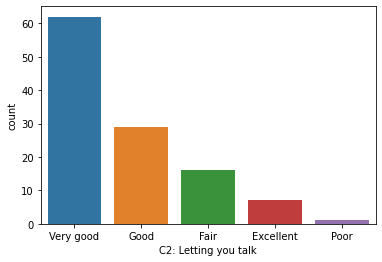

In [13]:
import seaborn as sns

sns.countplot(x=data.columns[27],data=data)

In [14]:
data_crosstab = pd.crosstab(data[data.columns[27]], 
                                data[data.columns[37]])  
print(data_crosstab)

BT7: Maintaining child’s comfort  A great deal  A lot  A small amount  \
C2: Letting you talk                                                    
Excellent                                    1      2               0   
Fair                                         2      5               3   
Good                                         8      9               1   
Poor                                         0      1               0   
Very good                                   13     25               4   

BT7: Maintaining child’s comfort  Moderate  None  
C2: Letting you talk                              
Excellent                                3     1  
Fair                                     6     0  
Good                                    10     1  
Poor                                     0     0  
Very good                               14     6  


In [15]:
for i in range(26,31):
 # print(data.columns[i])

  data_crosstab = pd.crosstab(data[data.columns[26]], 
                                data[data.columns[31]],  
                                  margins = False) 
  print(data_crosstab)

BTA great deal:Meeting the needs of the ill child  A great deal  A lot  \
C1: Making you Feel at Ease                                              
Excellent                                                     3      4   
Fair                                                          3      2   
Good                                                          8      3   
Poor                                                          2      1   
Very good                                                    23     24   

BTA great deal:Meeting the needs of the ill child  A small amount  Moderate  \
C1: Making you Feel at Ease                                                   
Excellent                                                       0         2   
Fair                                                            4         2   
Good                                                            3         4   
Poor                                                            0         1   
Very go

In [16]:
print("Conditional Probabilities\n")
for index1 in range(31,41):
  for index2 in range(26,31):
    data_crosstab = pd.crosstab(data[data.columns[index1]], 
                                data[data.columns[index2]],  
                                  margins = False) 
  
    #print("cross tabulating {} and {}".format(data.columns[index1],data.columns[index2]))
    #print(data_crosstab)
    #data_crosstab.iat[0, 0]
    k=data_crosstab.sum(axis=1)
    index=0
    for i in k:
      #print("probability of {} is {}".format(data_crosstab.index[index],int(i)/115))
      index=index+1
    #print("\n")
    sum_col=data_crosstab.sum()
    index=0
    for i in sum_col:
    # print("probability of {} is {}".format(data_crosstab.columns[index],int(i)/115))
      index=index+1
    val=data_crosstab.values
    ''' #print(val)
    
    for i in range(0,len(data_crosstab.index)):
      for j in range(0,len(data_crosstab.columns)):
      # print(" probability of {} intersection {} is {}".format(data_crosstab.index[i],data_crosstab.columns[j],int(val[i][j])/115))
        x=float(val[i][j]/sum_col[j])
        if x*100 >75:
          print(" {} is {}<-----  {} is  {} = {} %".format(data.columns[index1],data_crosstab.index[i],data.columns[index2],data_crosstab.columns[j],x*100))

    #print("\n")    ''' 
    for i in range(0,len(data_crosstab.index)):
      for j in range(0,len(data_crosstab.columns)):
      # print(" probability of {} intersection {} is {}".format(data_crosstab.index[i],data_crosstab.columns[j],int(val[i][j])/115))
        x=float(val[i][j]/k[i])
        if x*100 >75:
          print(" {} is  {} <------ {}  is  {} = {} %".format(data.columns[index2],data_crosstab.columns[j],data.columns[index1],data_crosstab.index[i],x*100))
    
    index2=index2+1
    #print("\n") 
  index1=index1+1

Conditional Probabilities

 C3: Listening and understanding is  Very good <------ BTA great deal:Meeting the needs of the ill child  is  A great deal = 76.92307692307693 %
 C1: Making you Feel at Ease is  Very good <------ BT3: Reporting to the treatment team  is  A lot = 77.77777777777779 %
 C1: Making you Feel at Ease is  Very good <------ BT3: Reporting to the treatment team  is  A small amount = 76.0 %
 C2: Letting you talk is  Very good <------ BT3: Reporting to the treatment team  is  A small amount = 76.0 %
 C3: Listening and understanding is  Very good <------ BT3: Reporting to the treatment team  is  A great deal = 75.86206896551724 %
 C1: Making you Feel at Ease is  Very good <------ BT4: Managing painful events  is  A lot = 76.19047619047619 %
 C2: Letting you talk is  Very good <------ BT4: Managing painful events  is  A lot = 85.71428571428571 %
 C3: Listening and understanding is  Very good <------ BT4: Managing painful events  is  A lot = 76.19047619047619 %
 C3: Listeni

if [BT7] Mainting a child's comfort is a great deal then there is more than 50 percent probability that[ C3 ] listening and understanding is very good

In [17]:
print("Conditional Probabilities\n")
for index1 in range(49,54):
  for index2 in range(index1+1,54):
    data_crosstab = pd.crosstab(data[data.columns[index1]], 
                                data[data.columns[index2]],  
                                  margins = False) 
  
    #print("cross tabulating {} and {}".format(data.columns[index1],data.columns[index2]))
    #print(data_crosstab)
    #data_crosstab.iat[0, 0]
    k=data_crosstab.sum(axis=1)
    index=0
    for i in k:
      #print("probability of {} is {}".format(data_crosstab.index[index],int(i)/115))
      index=index+1
    #print("\n")
    sum_col=data_crosstab.sum()
    index=0
    for i in sum_col:
    # print("probability of {} is {}".format(data_crosstab.columns[index],int(i)/115))
      index=index+1
    val=data_crosstab.values
   #print(val)
    
    for i in range(0,len(data_crosstab.index)):
      for j in range(0,len(data_crosstab.columns)):
      # print(" probability of {} intersection {} is {}".format(data_crosstab.index[i],data_crosstab.columns[j],int(val[i][j])/115))
        x=float(val[i][j]/sum_col[j])
        if x*100 >60:
          print(" {} is {}<-----  {} is  {} = {} %".format(data.columns[index1],data_crosstab.index[i],data.columns[index2],data_crosstab.columns[j],x*100))

    #print("\n")    
    for i in range(0,len(data_crosstab.index)):
      for j in range(0,len(data_crosstab.columns)):
      # print(" probability of {} intersection {} is {}".format(data_crosstab.index[i],data_crosstab.columns[j],int(val[i][j])/115))
        x=float(val[i][j]/k[i])
        if x*100 >60:
          print(" {} is  {} <------ {}  is  {} = {} %".format(data.columns[index2],data_crosstab.columns[j],data.columns[index1],data_crosstab.index[i],x*100))
    
    index2=index2+1
    #print("\n") 
  index1=index1+1

Conditional Probabilities

 AR5: How often do you put off refilling your child’s medicines because they cost too much money? is  Most of the times <------ AR4: How often do you change the dose of your child’s medicines to suit your child’s needs (like fewer pills than you’re supposed to)?  is  Always = 65.21739130434783 %


In [18]:
data.columns[48]

'Family Resource'

In [19]:

data_crosstab = pd.crosstab(data[data.columns[48]], 
                                data[data.columns[53]],  
                                  margins = False) 
print(data_crosstab)
	
#data_crosstab.iat[0, 0]
k=data_crosstab.sum(axis=1)
index=0
for i in k:
  #print("probability of {} is {}".format(data_crosstab.index[index],int(i)/115))
  index=index+1
print("\n")
sum_col=data_crosstab.sum()
index=0
for i in sum_col:
 # print("probability of {} is {}".format(data_crosstab.columns[index],int(i)/115))
  index=index+1
val=data_crosstab.values
#print(val)
print("Conditional Probabilities")
for i in range(0,len(data_crosstab.index)):
  for j in range(0,len(data_crosstab.columns)):
   # print(" probability of {} intersection {} is {}".format(data_crosstab.index[i],data_crosstab.columns[j],int(val[i][j])/115))
    x=float(float(val[i][j]))/sum_col[j]
    print("probability of {} given  {} is {} %".format(data_crosstab.index[i],data_crosstab.columns[j],x*100))

print("\n")
for i in range(0,len(data_crosstab.index)):
  for j in range(0,len(data_crosstab.columns)):
   # print(" probability of {} intersection {} is {}".format(data_crosstab.index[i],data_crosstab.columns[j],int(val[i][j])/115))
    x=float(float(val[i][j]))/k[i]
    print("probability of {} given  {} is {} %".format(data_crosstab.columns[j],data_crosstab.index[i],x*100))

AR5: How often do you put off refilling your child’s medicines because they cost too much money?  Always  \
Family Resource                                                                                            
Adequate                                                                                               9   
Inadequate                                                                                             4   

AR5: How often do you put off refilling your child’s medicines because they cost too much money?  Most of the times  \
Family Resource                                                                                                       
Adequate                                                                                                         28   
Inadequate                                                                                                       13   

AR5: How often do you put off refilling your child’s medicines because they cost too much 

In [20]:
print(data_crosstab)
	

AR5: How often do you put off refilling your child’s medicines because they cost too much money?  Always  \
Family Resource                                                                                            
Adequate                                                                                               9   
Inadequate                                                                                             4   

AR5: How often do you put off refilling your child’s medicines because they cost too much money?  Most of the times  \
Family Resource                                                                                                       
Adequate                                                                                                         28   
Inadequate                                                                                                       13   

AR5: How often do you put off refilling your child’s medicines because they cost too much 

In [21]:

data_crosstab = pd.crosstab(data[data.columns[54]], 
                                data[data.columns[55]],  
                                  margins = False) 
print(data_crosstab)
	
#data_crosstab.iat[0, 0]
k=data_crosstab.sum(axis=1)
sum_col=data_crosstab.sum()
val=data_crosstab.values
#print(val)
print("Conditional Probabilities")
for i in range(0,len(data_crosstab.index)):
  for j in range(0,len(data_crosstab.columns)):
   # print(" probability of {} intersection {} is {}".format(data_crosstab.index[i],data_crosstab.columns[j],int(val[i][j])/115))
    x=float(float(val[i][j]))/sum_col[j]
    print("probability of {} given  {} is {} %".format(data_crosstab.index[i],data_crosstab.columns[j],x*100))

print("\n")
for i in range(0,len(data_crosstab.index)):
  for j in range(0,len(data_crosstab.columns)):
   # print(" probability of {} intersection {} is {}".format(data_crosstab.index[i],data_crosstab.columns[j],int(val[i][j])/115))
    x=float(float(val[i][j]))/k[i]
    print("probability of {} given  {} is {} %".format(data_crosstab.columns[j],data_crosstab.index[i],x*100))

Missed doses          More than once  Never missed  One time
Delayed Appointments                                        
More than once                     2            11        12
Never missed                       9            17        14
One time                           8            26        16
Conditional Probabilities
probability of More than once given  More than once is 10.526315789473683 %
probability of More than once given  Never missed is 20.37037037037037 %
probability of More than once given  One time is 28.57142857142857 %
probability of Never missed given  More than once is 47.368421052631575 %
probability of Never missed given  Never missed is 31.48148148148148 %
probability of Never missed given  One time is 33.33333333333333 %
probability of One time given  More than once is 42.10526315789473 %
probability of One time given  Never missed is 48.148148148148145 %
probability of One time given  One time is 38.095238095238095 %


probability of More than once given 

In [22]:
print("Conditional Probabilities\n")
for index1 in range(26,31):
  for index2 in range(49,54):
    data_crosstab = pd.crosstab(data[data.columns[index1]], 
                                data[data.columns[index2]],  
                                  margins = False) 
  
    #print("cross tabulating {} and {}".format(data.columns[index1],data.columns[index2]))
    #print(data_crosstab)
    #data_crosstab.iat[0, 0]
    k=data_crosstab.sum(axis=1)
    index=0
    for i in k:
      #print("probability of {} is {}".format(data_crosstab.index[index],int(i)/115))
      index=index+1
    #print("\n")
    sum_col=data_crosstab.sum()
    index=0
    for i in sum_col:
    # print("probability of {} is {}".format(data_crosstab.columns[index],int(i)/115))
      index=index+1
    val=data_crosstab.values
   #print(val)
    
    for i in range(0,len(data_crosstab.index)):
      for j in range(0,len(data_crosstab.columns)):
      # print(" probability of {} intersection {} is {}".format(data_crosstab.index[i],data_crosstab.columns[j],int(val[i][j])/115))
        x=float(val[i][j]/sum_col[j])
        if (x*100) >= 75:
          print(" {} is {}---->  {} is  {} = {} %".format(data.columns[index2],data_crosstab.columns[j],data.columns[index1],data_crosstab.index[i],x*100))

    #print("\n")    
    for i in range(0,len(data_crosstab.index)):
      for j in range(0,len(data_crosstab.columns)):
      # print(" probability of {} intersection {} is {}".format(data_crosstab.index[i],data_crosstab.columns[j],int(val[i][j])/115))
        x=float(val[i][j]/k[i])
        if (x*100) >= 75:
           print(" {} is  {} -----> {}  is  {} = {} %".format(data.columns[index1],data_crosstab.index[i],data.columns[index2],data_crosstab.columns[j],x*100))
    
    index2=index2+1
    #print("\n") 
  index1=index1+1

Conditional Probabilities

 AR4: How often do you change the dose of your child’s medicines to suit your child’s needs (like fewer pills than you’re supposed to)? is Never---->  C1: Making you Feel at Ease is  Very good = 75.0 %
 AR5: How often do you put off refilling your child’s medicines because they cost too much money? is Never---->  C1: Making you Feel at Ease is  Very good = 81.25 %
 C1: Making you Feel at Ease is  Poor -----> AR5: How often do you put off refilling your child’s medicines because they cost too much money?  is  Most of the times = 75.0 %
 C2: Letting you talk is  Poor -----> AR1: How often do you forget to give medicine to your child?  is  Always = 100.0 %
 AR2: How often do you miss giving medicine to your child when your child feels better? is Always---->  C2: Letting you talk is  Very good = 76.19047619047619 %
 C2: Letting you talk is  Poor -----> AR2: How often do you miss giving medicine to your child when your child feels better?  is  Most of the times = 

In [23]:

data_crosstab = pd.crosstab([data[data.columns[60]], data[data.columns[26]]],  
                             data[data.columns[50]], margins = False)
data_crosstab

AR2: How often do you miss giving medicine to your child when your child feels better?  Always  \
IV5: You have been given counselling by the doc... C1: Making you Feel at Ease                   
Always                                             Excellent                                 0   
                                                   Fair                                      0   
                                                   Good                                      1   
                                                   Very good                                 5   
Most of the times                                  Excellent                                 0   
                                                   Fair                                      2   
                                                   Good                                      2   
                                                   Poor                                      0   
                                                   Very good                                 4   
Never                                              Fair                                      0   
                                                   Good                                      1   
                                                   Very good                                 1   
Some times                                         Fair                                      3   
                                                   Good                                      1   
                                                   Poor                                      0   
                                                   Very good                                 1   

AR2: How often do you miss giving medicine to your child when your child feels better?  Most of the times  \
IV5: You have been given counselling by the doc... C1: Making you Feel at Ease                              
Always                                             Excellent                                            0   
                                                   Fair                                                 0   
                                                   Good                                                 3   
                                                   Very good                                            6   
Most of the times                                  Excellent                                            1   
                                                   Fair                                                 2   
                                                   Good                                                 2   
                                                   Poor                                                 1   
                                                   Very good                                            8   
Never                                              Fair                                                 2   
                                                   Good                                                 4   
                                                   Very good                                            1   
Some times                                         Fair                                                 1   
                                                   Good                                                 0   
                                                   Poor                                                 1   
                                                   Very good                                            1   

AR2: How often do you miss giving medicine to your child when your child feels better?  Never  \
IV5: You have been given counselling by the doc... C1: Making you Feel at Ease                  
Always                                             Excellent                  

In [24]:
print("Conditional Probabilities\n")
for index1 in range(56,62):
  for index2 in range(49,50):
    data_crosstab = pd.crosstab(data[data.columns[index1]], 
                                data[data.columns[index2]],  
                                  margins = False) 
  
    #print("cross tabulating {} and {}".format(data.columns[index1],data.columns[index2]))
    #print(data_crosstab)
    #data_crosstab.iat[0, 0]
    k=data_crosstab.sum(axis=1)
    index=0
    for i in k:
      #print("probability of {} is {}".format(data_crosstab.index[index],int(i)/115))
      index=index+1
    #print("\n")
    sum_col=data_crosstab.sum()
    index=0
    for i in sum_col:
    # print("probability of {} is {}".format(data_crosstab.columns[index],int(i)/115))
      index=index+1
    val=data_crosstab.values
    '''  #print(val)
    
    for i in range(0,len(data_crosstab.index)):
      for j in range(0,len(data_crosstab.columns)):
      # print(" probability of {} intersection {} is {}".format(data_crosstab.index[i],data_crosstab.columns[j],int(val[i][j])/115))
        x=float(val[i][j]/sum_col[j])
        #if (x*100) >= 75:
        print(" {} is {}---->  {} is  {} = {} %".format(data.columns[index2],data_crosstab.columns[j],data.columns[index1],data_crosstab.index[i],x*100))

    #print("\n")    '''
    for i in range(0,len(data_crosstab.index)):
      for j in range(0,len(data_crosstab.columns)):
      # print(" probability of {} intersection {} is {}".format(data_crosstab.index[i],data_crosstab.columns[j],int(val[i][j])/115))
        x=float(val[i][j]/k[i])
        #if (x*100) >= 75:
        print(" {} is  {} -----> {}  is  {} = {} %".format(data.columns[index1],data_crosstab.index[i],data.columns[index2],data_crosstab.columns[j],x*100))
    
    index2=index2+1
    #print("\n") 
  index1=index1+1

Conditional Probabilities

 IV1: You have been well informed by the doctor about your child's illness is  Always -----> AR1: How often do you forget to give medicine to your child?  is  Always = 8.333333333333332 %
 IV1: You have been well informed by the doctor about your child's illness is  Always -----> AR1: How often do you forget to give medicine to your child?  is  Most of the times = 8.333333333333332 %
 IV1: You have been well informed by the doctor about your child's illness is  Always -----> AR1: How often do you forget to give medicine to your child?  is  Never = 33.33333333333333 %
 IV1: You have been well informed by the doctor about your child's illness is  Always -----> AR1: How often do you forget to give medicine to your child?  is  Some times = 50.0 %
 IV1: You have been well informed by the doctor about your child's illness is  Most of the times -----> AR1: How often do you forget to give medicine to your child?  is  Always = 12.5 %
 IV1: You have been well informed 

In [25]:
data.set_index("AR1: How often do you forget to give medicine to your child?").count(level="AR1: How often do you forget to give medicine to your child?")

TypeError: ignored

In [ ]:
data.columns[49]